In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
complaints = pd.read_csv("no_bia_with_officer_information.csv")

In [3]:
complaints.head()

,Unnamed: 0,LOG_NO,COMPLAINT_DATE,ASSIGNMENT,CASE_TYPE,CURRENT_STATUS,CURRENT_CATEGORY,FINDING_CODE,POLICE_SHOOTING,BEAT,...,num_unknown_officers,num_white_officers,num_police_officers,num_black_complainants,num_native_complainants,num_asian_complainants,num_hispanic_complainants,num_unknown_complainants,num_white_complainants,num_complainants
0,4,1092325,2019-01-11T15:18:16.000,COPA,Complaint,Pending Investigation,Excessive Force,NaN,No,1132,...,NaN,NaN,NaN,2.0,0.0,0.0,0.0,0.0,0.0,2.0
1,16,1092312,2019-01-11T00:50:55.000,COPA,Complaint,Pending Investigation,Excessive Force,NaN,No,1114,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22,1092306,2019-01-10T14:09:40.000,COPA,Complaint,Pending Investigation,Operational Violation,NaN,No,411,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,23,1092305,2019-01-10T13:55:51.000,COPA,Complaint,Pending Investigation,Unlawful Denial of Counsel,NaN,No,1933,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,24,1092304,2019-01-10T13:24:46.000,COPA,Complaint,Pending Investigation,Civil Suits,NaN,No,835,...,0.0,4.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [4]:
complaints.shape

(23556, 34)

In [5]:
'''
Compute the %missing for each columns in the dataset
'''

complaints.isnull().sum()/len(complaints)*100

Unnamed: 0                              0.000000
LOG_NO                                  0.000000
COMPLAINT_DATE                          0.000000
ASSIGNMENT                              0.000000
CASE_TYPE                               0.000000
CURRENT_STATUS                          0.000000
CURRENT_CATEGORY                        0.305655
FINDING_CODE                            5.043301
POLICE_SHOOTING                         0.000000
BEAT                                    0.000000
RACE_OF_COMPLAINANTS                    6.469689
SEX_OF_COMPLAINANTS                     6.469689
AGE_OF_COMPLAINANTS                     6.469689
RACE_OF_INVOLVED_OFFICERS              25.938190
SEX_OF_INVOLVED_OFFICERS               25.938190
AGE_OF_INVOLVED_OFFICERS               25.938190
YEARS_ON_FORCE_OF_INVOLVED_OFFICERS    25.938190
COMPLAINT_HOUR                          0.000000
COMPLAINT_DAY                           0.000000
COMPLAINT_MONTH                         0.000000
num_black_officers  

# FILTER OUT ROWS THAT HAVE EMPTY VALUES FOR 'RACE_OF_COMPLAINANTS' AND 'RACE_OF_INVOLVED_OFFICERS' COLUMNS 

In [6]:
'''
The code below filters out rows that have empty values for 'RACE_OF_COMPLAINANTS' and 'RACE_OF_INVOLVED_OFFICERS'.
'''

notnull_offcier = complaints.RACE_OF_INVOLVED_OFFICERS.notnull()
notnull_complaintnant = complaints.RACE_OF_COMPLAINANTS.notnull()

#The filter only keeps rows that have non-null values in both RACE_OF_INVOLVED_OFFICERS and RACE_OF_COMPLAINANTS.
boolean_filter = notnull_offcier & notnull_complaintnant

#apply the boolean filter to the original dataframe
filtered_complaints = complaints[boolean_filter]

#check for the number of nullvlaues for each column. All rows are filtered out.
print(filtered_complaints.isnull().sum())

Unnamed: 0                               0
LOG_NO                                   0
COMPLAINT_DATE                           0
ASSIGNMENT                               0
CASE_TYPE                                0
CURRENT_STATUS                           0
CURRENT_CATEGORY                        44
FINDING_CODE                           902
POLICE_SHOOTING                          0
BEAT                                     0
RACE_OF_COMPLAINANTS                     0
SEX_OF_COMPLAINANTS                      0
AGE_OF_COMPLAINANTS                      0
RACE_OF_INVOLVED_OFFICERS                0
SEX_OF_INVOLVED_OFFICERS                 0
AGE_OF_INVOLVED_OFFICERS                 0
YEARS_ON_FORCE_OF_INVOLVED_OFFICERS      0
COMPLAINT_HOUR                           0
COMPLAINT_DAY                            0
COMPLAINT_MONTH                          0
num_black_officers                       0
num_native_officers                      0
num_asian_officers                       0
num_hispani

All rows with null values in 'RACE_OF_INVOLVED_OFFICERS' and 'RACE_OF_COMPLAINANTS' have been dropped

# ANALYZING THE NUMBER OF POLICE OFFICERS INVOLVED IN COMPLAINTS

<b> FINDINGS: </b>

1. Approximately 94% of complaints involve 3 or less police officers
2. 66% of complaints only involve 1 police officer.
3. 22% of complaints involve 2 police officers.
4. 11569 complaints inolve only 1 police officer.
5. 3867 complaints involve 2 police officers.
6. 1034 complaints involve 3 police officers.

In [7]:
'''
Distribution of the number of police officers involved in a single complaint.

INTERPRETATION EXAMPLE:

1. 11569 complaints involve only 1 police officer.
2. 3867 complaints involve 2 police officers.
3. 1034 complaints involve 3 police officers.
'''

num_officers_involved = complaints.num_police_officers.value_counts().sort_index()
num_officers_involved

1.0     11569
2.0      3867
3.0      1034
4.0       488
5.0       183
6.0        91
7.0        85
8.0        34
9.0        23
10.0       22
11.0       16
12.0       10
13.0        5
14.0        5
15.0        5
16.0        2
18.0        1
19.0        1
22.0        2
23.0        1
32.0        1
49.0        1
Name: num_police_officers, dtype: int64

Text(0, 0.5, 'Total Number of Officers')

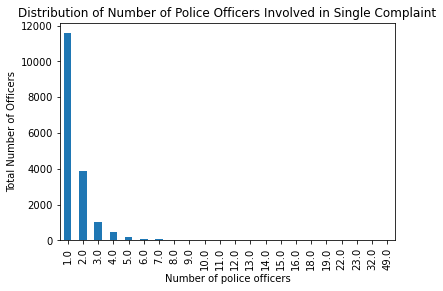

In [8]:
num_officers_involved.plot(kind='bar')
plt.title("Distribution of Number of Police Officers Involved in Single Complaint")
plt.xlabel("Number of police officers")
plt.ylabel("Total Number of Officers")

In [9]:
'''
The code below shows the relative frequency distribution for the number of police officers involved in a single complaint.

INTERPRETATION EXAMPLE:

1. 66% of complaints involve 1 police officer.
2. 22% of complaints involve 2 police officers.
3. 6% of complaints involve 3 police officers.
'''

num_officers_involved/num_officers_involved.sum()*100

1.0     66.313195
2.0     22.165539
3.0      5.926860
4.0      2.797203
5.0      1.048951
6.0      0.521610
7.0      0.487218
8.0      0.194887
9.0      0.131835
10.0     0.126103
11.0     0.091712
12.0     0.057320
13.0     0.028660
14.0     0.028660
15.0     0.028660
16.0     0.011464
18.0     0.005732
19.0     0.005732
22.0     0.011464
23.0     0.005732
32.0     0.005732
49.0     0.005732
Name: num_police_officers, dtype: float64

# CORRELATION MATRIX FOR OFFICER AND COMPLIANANT RACES (STANDARDIZED)

<b>The purpose of this section is to determine correlations between the races of complainants and officers. </b>

<font size="4"> <b> SUMMARY OF FINDINGS IN CORREALATION STUDY (PRELIMINARY) </b> </font>



In [10]:
'''
NOTE: This project is a work in progress, and the results are preliminary.

Below is a table showing the correlation between complainants and officers' races.

METHODOLOGY:

Spearman's correlation coefficient was used because the metric does not assume normality 
between independent and dependent variables. Furthermore, the p-value calculation does not assume normality.

INTERPRETATION OF FINDINGS:

1. The more black complainants are involved, the greater number of black police officers are involved.
2. The more Hispanic complainants are involved, the greater number of Hispanic police officers are involved.
3. The more white complainants are involved, the greater number of white police officers are involved.

All three have a very weak correlation but are statistically significant 
due to extremely small p-values. 

Further improvement in methodologies and further study is required to yield more evident results.
'''

pd.DataFrame({'complainant_percent':['black','hispanic','white'],
              'officer_percent':['black','hispanic','white'],
              'Spearman correlation coefficient':[0.21,0.14,0.13],
              'p-value':['1.0302766316806912e-158','1.2898153757184937e-66','9.20438964202533e-61'],
              'significance?':['SIGNIFICANT RESULT','SIGNIFICANT RESULT','SIGNIFICANT RESULT']})

,complainant_percent,officer_percent,Spearman correlation coefficient,p-value,significance?
0,black,black,0.21,1.0302766316806912e-158,SIGNIFICANT RESULT
1,hispanic,hispanic,0.14,1.2898153757184937e-66,SIGNIFICANT RESULT
2,white,white,0.13,9.20438964202533e-61,SIGNIFICANT RESULT


In [11]:
from scipy.stats import spearmanr

In [12]:
'''
Standardizes the race count columns for complainants 
and officer races. The code below converts race columns into percentages.

EXAMPLE: Given the COLUMNS below:

num_hispanic_complainants  num_white_complainants   num_complianants   num_black_officers   num_white_officers  num_officers
          2                        3                      5                   3                    5                8

The rows above will be converted to:

hispanic_complainants_percent    white_complainants_percent     black_officers_percent    white_officers_percent
    2/5 = 40%                         3/5  = 60%                      3/8 = 37.5%              5/8 = 62.5%
'''

officer_races = ['num_black_officers','num_native_officers','num_asian_officers',
                 'num_hispanic_officers','num_unknown_officers','num_white_officers']

for officer_race in officer_races:
    filtered_complaints[officer_race[4:]+'_percent'] = filtered_complaints[officer_race]/filtered_complaints['num_police_officers']*100


complaintnant_races = ['num_black_complainants','num_native_complainants','num_asian_complainants',
                       'num_hispanic_complainants','num_unknown_complainants','num_white_complainants',]

for complainant_race in complaintnant_races:
    filtered_complaints[complainant_race[4:]+'_percent'] = filtered_complaints[complainant_race]/filtered_complaints['num_complainants']*100

C:\Users\ANGELO~1\AppData\Local\Temp/ipykernel_9036/3041132469.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_complaints[officer_race[4:]+'_percent'] = filtered_complaints[officer_race]/filtered_complaints['num_police_officers']*100
C:\Users\ANGELO~1\AppData\Local\Temp/ipykernel_9036/3041132469.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_complaints[complainant_race[4:]+'_percent'] = filtered_complaints[complainant_race]/filtered_complaints['num_complainants']*100


<AxesSubplot:>

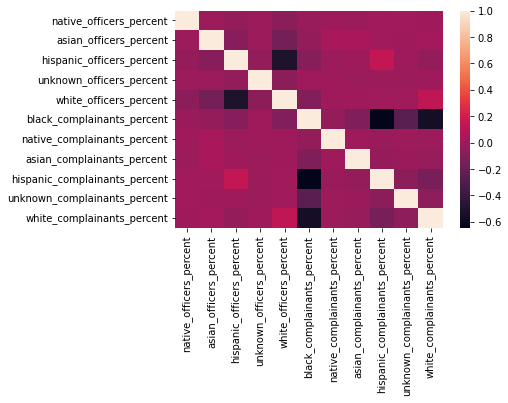

In [13]:
'''
Pearsons correlation matrix between race of % complainants and % officers.
'''

filter_cols = filtered_complaints.columns[35:]

race_only = filtered_complaints[filter_cols].corr()

sns.heatmap(race_only)


<AxesSubplot:>

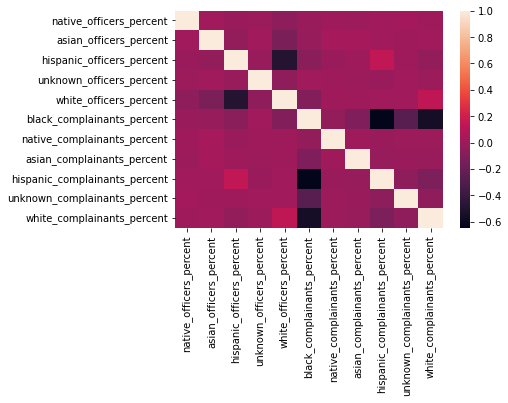

In [14]:
'''
Spearman's correlation matrix between race of % complainants and % officers.
'''

filter_cols = filtered_complaints.columns[35:]

race_only = filtered_complaints[filter_cols].corr(method='spearman')

sns.heatmap(race_only)

SpearmanrResult(correlation=0.20894722602306007, pvalue=1.0302766316806912e-158)


<AxesSubplot:xlabel='black_complainants_percent', ylabel='black_officers_percent'>

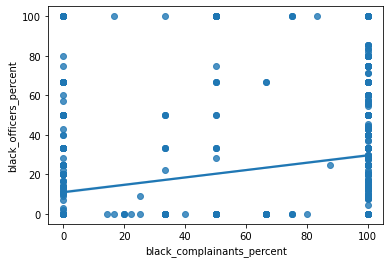

In [15]:
'''
black_complainants_percent vs. black_officers_percent

SpearmanrResult(correlation=0.20894722602306007, pvalue=1.0302766316806912e-158)
'''

r_black = spearmanr(filtered_complaints.black_complainants_percent,filtered_complaints.black_officers_percent)
print(r_black)
sns.regplot(data=filtered_complaints, x='black_complainants_percent',y='black_officers_percent')

SpearmanrResult(correlation=0.13509123561928396, pvalue=1.2898153757184937e-66)


<AxesSubplot:xlabel='hispanic_complainants_percent', ylabel='hispanic_officers_percent'>

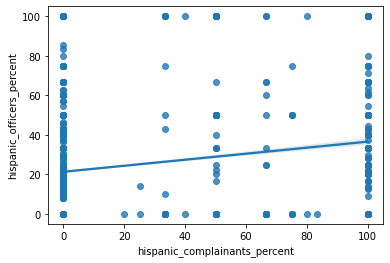

In [16]:
'''
hispanic_complainants_percent vs. hispanic_officers_percent

SpearmanrResult(correlation=0.13509123561928396, pvalue=1.2898153757184937e-66)
'''

r_hispanic = spearmanr(filtered_complaints.hispanic_complainants_percent,filtered_complaints.hispanic_officers_percent)
print(r_hispanic)
sns.regplot(data=filtered_complaints, x='hispanic_complainants_percent',y='hispanic_officers_percent')

SpearmanrResult(correlation=0.12889679273049592, pvalue=9.20438964202533e-61)


<AxesSubplot:xlabel='white_complainants_percent', ylabel='white_officers_percent'>

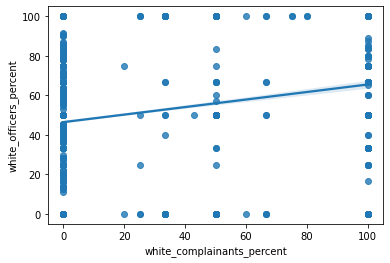

In [17]:
'''
white_complainants_percent vs. white_officers_percent

SpearmanrResult(correlation=0.12889679273049592, pvalue=9.20438964202533e-61)
'''

r_white = spearmanr(filtered_complaints.white_complainants_percent,filtered_complaints.white_officers_percent)
print(r_white)
sns.regplot(data=filtered_complaints, x='white_complainants_percent',y='white_officers_percent')

SpearmanrResult(correlation=-0.5574980513613024, pvalue=0.0)


<AxesSubplot:xlabel='white_complainants_percent', ylabel='black_complainants_percent'>

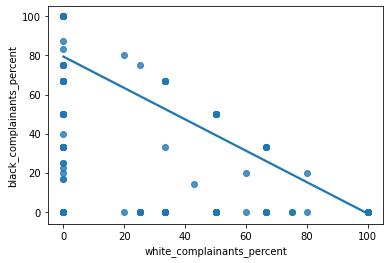

In [18]:
'''
white_complainants_percent vs. black_complainants_percent

SpearmanrResult(correlation=-0.5574980513613024, pvalue=0.0)
'''

r1 = spearmanr(filtered_complaints.white_complainants_percent,filtered_complaints.black_complainants_percent)
print(r1)
sns.regplot(data=filtered_complaints, x='white_complainants_percent',y='black_complainants_percent')

SpearmanrResult(correlation=-0.6485642096340588, pvalue=0.0)


<AxesSubplot:xlabel='hispanic_complainants_percent', ylabel='black_complainants_percent'>

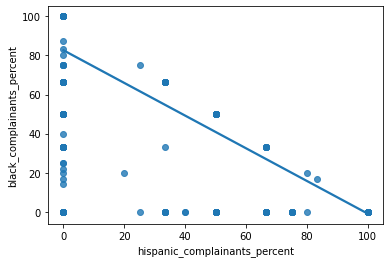

In [19]:
'''
hispanic_complainants_percent vs. black_complainants_percent

SpearmanrResult(correlation=-0.6485642096340588, pvalue=0.0)
'''

r2 = spearmanr(filtered_complaints.hispanic_complainants_percent,filtered_complaints.black_complainants_percent)
print(r2)
sns.regplot(data=filtered_complaints, x='hispanic_complainants_percent',y='black_complainants_percent')

# ANALYZING RACE INTERACTION BETWEEN COMPLAINANTS AND OFFICERS

<font size="4"> <b> NOTE: THIS SECTION IS WORK IN PROGRESS </b> </font>

This section aims to analyze race interactions between police officers and complainants.

Specifically, this section analyzes if specific races of complainants are more likely to file a complaint against specific races of police officers.

For example: Are whites more likely to file a complaint against Hispanic police officers? 

METHODOLOGY:

1. Filter for complaints where most complainants are of one race. The threshold to determine the majority is 75% of one race. For example, 75% of complainants are Hispanics.
2. After filtering, analyze the race distribution of police officers involved.






In [20]:
'''
The code below is the prototype code for the methodology described above.

Furthermore, the code below calculates the distribution of races of police 
officers where the complainants are mostly black or all black.

The threshold for determining "majority %" is 75%.
'''

#create a new columns that represents % complianants are black in a single case.
filtered_complaints['percent_black_complainant'] = (filtered_complaints['num_black_complainants']/filtered_complaints['num_complainants'])*100

#only select complaints where the majority of complainants are black.
black_percent = filtered_complaints[filtered_complaints.percent_black_complainant >= 75]

officer_columns = ['num_black_officers','num_native_officers','num_asian_officers','num_hispanic_officers','num_unknown_officers','num_white_officers']

#calculate the officer distribution where the majority of complainants are black
officer_sums = black_percent[officer_columns].sum()

#calculate the relative frequency of the officer distribution where the majority of complainants are black
officer_percents = officer_sums/black_percent['num_police_officers'].sum()*100


C:\Users\ANGELO~1\AppData\Local\Temp/ipykernel_9036/3140607151.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_complaints['percent_black_complainant'] = (filtered_complaints['num_black_complainants']/filtered_complaints['num_complainants'])*100


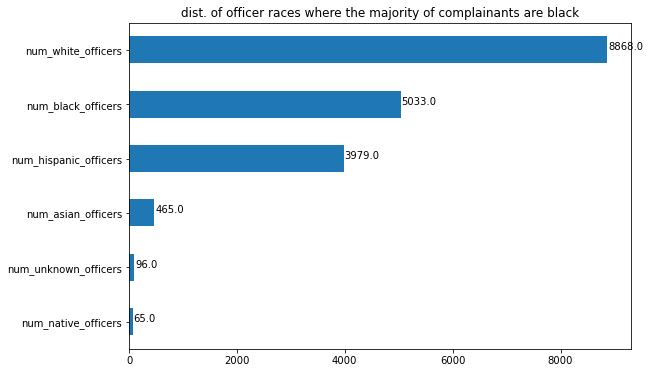

In [21]:
'''
Distribution of officers races where 75% or more complainants are black.
'''

chart = officer_sums.sort_values().plot(kind='barh',figsize=(9,6))
plt.title('dist. of officer races where the majority of complainants are black')
for i, v in enumerate(officer_sums.sort_values().values):
    chart.text(v+20, i, v)

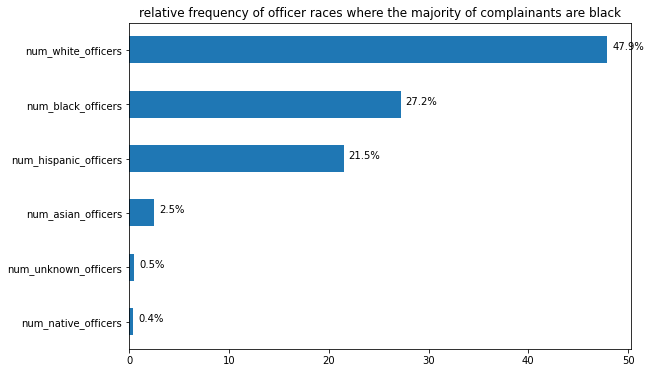

In [22]:
'''
Relative frequency of officer's races where 75% or more complainants are black.
'''

chart = officer_percents.sort_values().plot(kind='barh',figsize=(9,6))
plt.title('relative frequency of officer races where the majority of complainants are black')
for i, v in enumerate(officer_percents.sort_values().round(1).values):
    chart.text(v+0.5, i, str(v)+'%')

# ANALYZING THE RACES OF POLICE OFFICERS INVOLVED IN DIFFERENT CASE TYPES

<font size="4"> <b> NOTE: THIS SECTION  IS WORK IN PROGRESS </b> </font>
    
<font size="4"> <b> The purpose of this section is to analyze the officer races involved in different allegations. </b> </font>

SUMMARY OF FINDINGS:

The top 5 allegations against police officers are: 

1. Excessive Force                  8487
2. Taser Notification               4711
3. Miscellaneous                    3021
4. Verbal Abuse                     1463
5. Unnecessary Display of Weapon    1016

In [23]:
one_officer = complaints

In [24]:
'''
Distribution of allegations against police officers.
'''
one_officer.CURRENT_CATEGORY.value_counts().sort_values(ascending=False)

Excessive Force                  8487
Taser Notification               4711
Miscellaneous                    3021
Verbal Abuse                     1463
Unnecessary Display of Weapon    1016
Firearm Discharge at Animal       731
Civil Suits                       680
Domestic Violence                 637
Search or Seizure                 563
Firearm Discharge - Hits          460
Death or Injury In Custody        424
OC Discharge                      413
Firearm Discharge - No Hits       385
Coercion                          169
Operational Violation             135
Taser Discharge                    96
Motor Vehicle Related Death        45
Legal Violation                    21
Bias                               17
Unlawful Denial of Counsel         10
Name: CURRENT_CATEGORY, dtype: int64

In [25]:
'''
The code below generates a table that shows the distribution of 
races of involved police officers in different allegation types. 
'''

'''
NOTE(PLEASE IGNORE): This part of the analysis uses the orginal dataframe because the 
                     filtered dataframe has some rows removed when the 'RACE_OF_INVOLVED_OFFICERS' is not null.
'''
target_columns = complaints.columns[20:27]
grouped_one_officer = one_officer.groupby("CURRENT_CATEGORY")[target_columns].sum()
#total_officers_per_category = grouped_one_officer.num_police_officers.values
grouped_one_officer

,num_black_officers,num_native_officers,num_asian_officers,num_hispanic_officers,num_unknown_officers,num_white_officers,num_police_officers
CURRENT_CATEGORY,,,,,,,
Bias,2.0,0.0,0.0,9.0,0.0,8.0,19.0
Civil Suits,395.0,10.0,58.0,487.0,16.0,1157.0,2123.0
Coercion,61.0,0.0,2.0,32.0,1.0,106.0,202.0
Death or Injury In Custody,299.0,3.0,20.0,135.0,1.0,279.0,737.0
Domestic Violence,270.0,4.0,11.0,144.0,3.0,265.0,697.0
Excessive Force,2090.0,31.0,249.0,2083.0,48.0,4781.0,9282.0
Firearm Discharge - Hits,164.0,1.0,20.0,229.0,0.0,422.0,836.0
Firearm Discharge - No Hits,140.0,2.0,16.0,113.0,0.0,243.0,514.0
Firearm Discharge at Animal,248.0,3.0,10.0,214.0,0.0,410.0,885.0


In [26]:
'''
The code below generates a table that shows the relative frequency of the races of involved police officers in different complaint types.

For example, 47.36% of officers involved in Bias are Hispanic.
'''
percent_one_officer = grouped_one_officer[grouped_one_officer.columns[:-1]].divide(grouped_one_officer["num_police_officers"], axis="index")*100
percent_one_officer['total_percent'] = percent_one_officer.sum(axis=1)
percent_one_officer

,num_black_officers,num_native_officers,num_asian_officers,num_hispanic_officers,num_unknown_officers,num_white_officers,total_percent
CURRENT_CATEGORY,,,,,,,
Bias,10.526316,0.000000,0.000000,47.368421,0.000000,42.105263,100.0
Civil Suits,18.605747,0.471032,2.731983,22.939237,0.753650,54.498351,100.0
Coercion,30.198020,0.000000,0.990099,15.841584,0.495050,52.475248,100.0
Death or Injury In Custody,40.569878,0.407056,2.713704,18.317503,0.135685,37.856174,100.0
Domestic Violence,38.737446,0.573888,1.578192,20.659971,0.430416,38.020086,100.0
Excessive Force,22.516699,0.333980,2.682612,22.441284,0.517130,51.508296,100.0
Firearm Discharge - Hits,19.617225,0.119617,2.392344,27.392344,0.000000,50.478469,100.0
Firearm Discharge - No Hits,27.237354,0.389105,3.112840,21.984436,0.000000,47.276265,100.0
Firearm Discharge at Animal,28.022599,0.338983,1.129944,24.180791,0.000000,46.327684,100.0


In [27]:
complaints.FINDING_CODE.value_counts()

No Finding       8202
NO AFFIDAVIT     5925
NOT SUSTAINED    4767
UNFOUNDED        2349
SUSTAINED        1002
EXONERATED        123
Name: FINDING_CODE, dtype: int64

In [28]:
complaints.CURRENT_STATUS.value_counts()

Closed                   22104
Pending Investigation     1188
Pending CPD Review         225
Undefined                   23
Pending Police Board         9
Suspended                    5
Pending DOL Review           1
Pending Discipline           1
Name: CURRENT_STATUS, dtype: int64